<img src="Logo_P6.PNG" height="400" width="400" >
<h1 style="color:blue; text-align:center; background-color:AliceBlue; font-size:300%; font-family:verdana; border:2px solid DodgerBlue"><br>ANALYSE DE LA VENTE EN LIGNE<br>
<h5 style="color:black; text-align:right">NGUYEN Huynh Thanh Qui<br>Septembre 2021<br></h5>
</h1>

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>Etude de données<br></h1>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>I. Importation et lecture de données<br></h2>

In [1]:
#Importation de bibliothèques
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorama
from colorama import Fore, Back, Style

In [2]:
#Lecture de données
transactions = pd.read_csv('transactions.csv')
products = pd.read_csv('products.csv')
customers = pd.read_csv('customers.csv')

<h3 style="color:blue; text-align:center; font-size:100%; font-family:Georgia; border:2px solid DodgerBlue"><br>Fichier 'transactions'<br></h3>

<h4 style="color:black"><br>1. Etude de données<br></h4>

In [3]:
#Afficher les données et les informations
transactions.info()
print(Fore.BLUE + Style.BRIGHT + f"Le fichier 'transactions' contient 679532 lignes complètes (non-null). \
Le type de données de la colonne 'date' est object, donc, je la transformerai en datetime" + Style.RESET_ALL )

display(transactions.head())
transactions.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
Le fichier 'transactions' contient 679532 lignes complètes (non-null). Le type de données de la colonne 'date' est object, donc, je la transformerai en datetime


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


(679532, 4)

In [4]:
#Observation des données de la colonne 'date'
#display(transactions.groupby(by='date').count())
print(Fore.BLUE+Style.BRIGHT+f"La colonne 'date' contient des données de type 'object' et 'datetime' en même temps. \
Afin de changer le type de données de cette colonne, je fais un tri sur les valeurs contenant la chaîne de caractères ('test')"+ Style.RESET_ALL )

#Trier des lignes contenant de la chaîne de caractères
transactions['new_date'] = transactions['date']
transactions['new_date'] = transactions['new_date'].str.slice(0, 10)
display(transactions[transactions['new_date'].str.contains('test')].shape)
print(Fore.BLUE+Style.BRIGHT+f"Les données triées sont celles des tests, donc, je les sépare pour avoir des données de transactions réelles"+ Style.RESET_ALL )

#Filtration de données
new_transactions=transactions[~transactions['new_date'].str.contains('test')]
new_transactions=new_transactions.loc[:, ('id_prod', 'date', 'session_id', 'client_id', 'new_date')]

new_transactions['new_date']=pd.to_datetime(transactions[~transactions['new_date'].str.contains('test')]['new_date'])
new_transactions.info()
display(new_transactions.shape)
print(Fore.BLUE+Style.BRIGHT+f"Ce nouveau dataframe (df 'new_transaction') possède que les données de la transaction réelle et celle de la date est sous forme 'datetime'"+ Style.RESET_ALL)

La colonne 'date' contient des données de type 'object' et 'datetime' en même temps. Afin de changer le type de données de cette colonne, je fais un tri sur les valeurs contenant la chaîne de caractères ('test')


(200, 5)

Les données triées sont celles des tests, donc, je les sépare pour avoir des données de transactions réelles
<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  object        
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   new_date    679332 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 31.1+ MB


(679332, 5)

Ce nouveau dataframe (df 'new_transaction') possède que les données de la transaction réelle et celle de la date est sous forme 'datetime'


<h4 style="color:black"><br>2. Observation de données<br></h4>

<ul style="font-family:Time">
  <li>Les dates de transactions sont des enregistrements en temps réels</li>
  <li>Afin d'observer des ventes en ligne par jour (ou mois), je crée la colonne 'month' puis je la converti en type 'datetime' pour les analyses en graphique.</li>
</ul>

In [5]:
#transactions_web.loc[:,'month']=pd.to_datetime(transactions_web['month'].copy()).dt.date

In [6]:
#Créer la colonne 'mois'
new_transactions['month']=pd.to_datetime(new_transactions['new_date'].dt.strftime('%Y-%m'))
#display(new_transactions.head())
display(new_transactions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  object        
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   new_date    679332 non-null  datetime64[ns]
 5   month       679332 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 36.3+ MB


None

<ul style="font-family:Time">
  <li>Le nombre de ventes en fonction du jours :</li>

En générale, il n'y a pas de lacune du nombre de ventes sur l'ensemble période examinée.  Cependant, on observe une chute inquiétante du nombre de transactions en fin de l'année 2021, plus précisément en octobre 2021; Le détail de cette chute sera analysé dans la partie 2


,id_prod
new_date,
2021-10-25,577
2021-10-27,579
2021-10-20,597
2021-10-23,602
2021-10-19,604


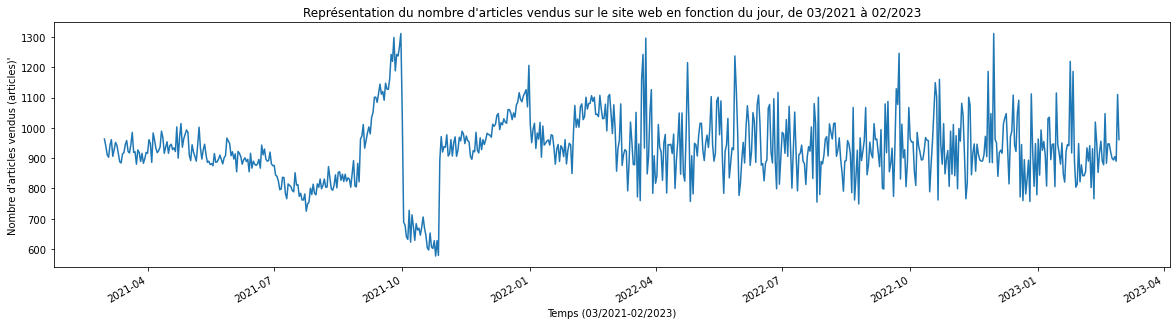

In [7]:
new_transactions.groupby(by='new_date').count().sort_values(by='id_prod')['id_prod'].plot(kind='line', figsize=(20,5))
plt.title("Représentation du nombre d'articles vendus sur le site web en fonction du jour, de 03/2021 à 02/2023")
plt.xlabel("Temps (03/2021-02/2023)")
plt.ylabel("Nombre d'articles vendus (articles)'")
print(Fore.BLUE+Style.BRIGHT+ f"En générale, il n'y a pas de lacune du nombre de ventes sur l'ensemble période examinée.  \
Cependant, on observe une chute inquiétante du nombre de transactions en fin de l'année 2021, plus précisément en octobre 2021; \
Le détail de cette chute sera analysé dans la partie 2" + Fore.RESET)

#Zoom sur la chute de nombre de sessions
chute_sessions=new_transactions.loc[new_transactions["new_date"].between('2021-10-01', '2021-12-15')]
display(chute_sessions.groupby(by=['new_date']).count().sort_values(by='id_prod')['id_prod'].to_frame().head())

<h3 style="color:blue; text-align:center; font-size:100%; font-family:Georgia; border:2px solid DodgerBlue"><br>Fichier 'products'<br></h3>

<h4 style="color:black"><br>1. Etude de données<br></h4>

In [8]:
display(products.head())
products.info()
print(Fore.BLUE +Style.BRIGHT+ f"Ce fichier ne contient pas de valeurs nulls dans sa clé primaire (PK) (et même dans les autres colonnes). \
En excécutant la fonction 'value_counts', je trouve que l'unicité de PK est assurée ou chaque produit a une clé primaire")
display(products['id_prod'].value_counts().tail().to_frame())

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
Ce fichier ne contient pas de valeurs nulls dans sa clé primaire (PK) (et même dans les autres colonnes). En excécutant la fonction 'value_counts', je trouve que l'unicité de PK est assurée ou chaque produit a une clé primaire


,id_prod
1_159,1
2_53,1
0_1947,1
0_1095,1
0_1270,1


<h4 style="color:black"><br>2. Observation de données<br></h4>

<p style="font-family:Time"> <b>La répartition du prix</b><br>
  <ul style="font-family:Time">
      <li>Afin d'avoir une vue globale sur le prix des produits, je fais une recherche plus profonde sur la répartition du prix des produits de notre base donnée (BD)</li>
      <li>Pour cela, je vais créer un histogramme en divisant les prix par 100 tranches</li>
      <li>Ensuite, je vais les analyser en observant le nombre de produits groupés par catégorie ainsi que la répartition du prix en fonction de la catégorie de produits (diagramme en boîte à moustaches)</li>
  <ul>
</p>

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

La plupart des prix se trouvent entre 6 euros et 22 euros. Cependant, je trouve qu'il y a des valeurs négatives dans le prix, donc, je vais les séparer et les examiner dans la requête suivante


,id_prod,price,categ
731,T_0,-1.0,0


Le résultat de cette requête nous donne une valeur négative ou il y a un prix qui est inférieur à 0. Ce produit correspond à un produit de test dans le fichier 'transactions'. C'est pour cette raison, je le garde pour avoir un référence de produit 'test' dans nos données de produits car il n'influence pas les transactions à analyser plus tard
Le df 'new_product contient des produits ayant le prix suppérieur à 0
La distribution de prix des produits (divisés par 100 tranches de prix) en histogramme. Les prix se trouvent entre 0,62 euros et 300 euros. La plupart des produits ont un prix de moins 50 euros


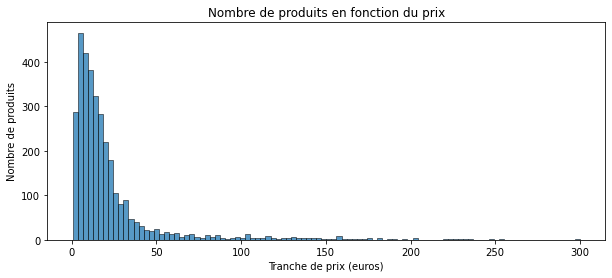

In [9]:
display(products['price'].describe())
print(Fore.BLUE +Style.BRIGHT + f"La plupart des prix se trouvent entre 6 euros et 22 euros. \
Cependant, je trouve qu'il y a des valeurs négatives dans le prix, donc, je vais les séparer et les examiner dans la requête suivante")

#Séparer les valeurs anormales qui sont inférieurs à 0
display(products[products['price']<= 0])
print(Fore.BLUE +Style.BRIGHT + f"Le résultat de cette requête nous donne une valeur négative ou il y a un prix qui est inférieur à 0. \
Ce produit correspond à un produit de test dans le fichier 'transactions'. C'est pour cette raison, je le garde pour avoir un référence de produit 'test' \
dans nos données de produits car il n'influence pas les transactions à analyser plus tard")

#Selectionner les données réelles de produits
new_products=products[~(products['price']<= 0)]
#display(new_products.sort_values('price').head())
print(Fore.BLUE + f"Le df 'new_product contient des produits ayant le prix suppérieur à 0")

#Histogramme
figure = plt.figure(figsize = (10, 4))
sns.histplot(new_products, x="price", bins=(100)).set(
    title='Nombre de produits en fonction du prix',
    xlabel='Tranche de prix (euros)',
    ylabel='Nombre de produits')

print(Fore.BLUE+Style.BRIGHT + f"La distribution de prix des produits (divisés par 100 tranches de prix) en histogramme. \
Les prix se trouvent entre 0,62 euros et 300 euros. La plupart des produits ont un prix de moins 50 euros")

Description des produits au seine de chaque catégorie :


price                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

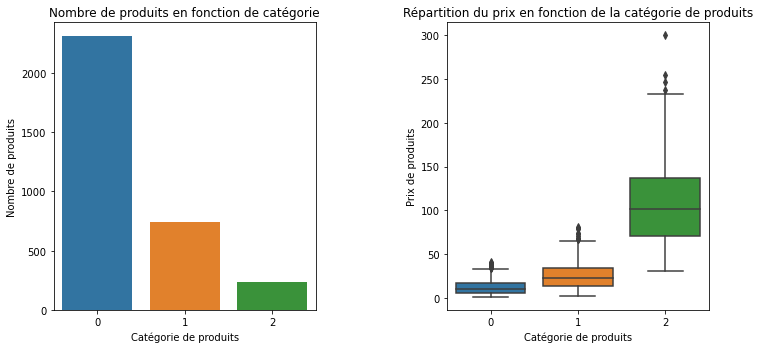

In [10]:
figure = plt.figure(figsize = (7, 5))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 2)

#Diagramme en bâton des produits réels
axes = figure.add_subplot(1, 2, 1)
sns.countplot(x='categ', data=new_products).set(
    title='Nombre de produits en fonction de catégorie',
    xlabel='Catégorie de produits',
    ylabel='Nombre de produits')

#Boîte à moustaches des produits réels
axes = figure.add_subplot(1, 2, 2)
sns.boxplot(x="categ", y="price", data=new_products).set(
    title='Répartition du prix en fonction de la catégorie de produits',
    xlabel='Catégorie de produits',
    ylabel='Prix de produits')

print(Fore.BLUE + Style.BRIGHT + f"Description des produits au seine de chaque catégorie :")

new_products.groupby(by='categ').describe()

<ul style="font-family:Time"><b><u>Observation</u> :</b> 
  <ul style="font-family:Time"><br>
      <li>La plupart des produits sont classés en catégorie 0 et les prix sont moins chers en comparant avec les 2 autres</li>
      <li>Le prix des produits de la catégorie 2 est plus chers et son intervalle de prix est plus large (de 40 à 300 euros)</li>
      <li>Le prix moyen des produits augmente en fonction de la catégorie, donc de 0 à 2, contrairement au nombre de produits par catégorie.</li>
  <ul>

<h3 style="color:blue; text-align:center; font-size:100%; font-family:Georgia; border:2px solid DodgerBlue"><br>Fichier 'customers'<br></h3>

<h4 style="color:black"><br>1. Etude de données<br></h4>

In [11]:
#display(customers.head)
customers.info()
display(customers['client_id'].value_counts().to_frame().tail())
print(Fore.BLUE + Style.BRIGHT + f"Ce fichier ne contient pas de valeurs nulls dans sa PK (et même dans les autres colonnes). \
En excécutant la fonction 'value_counts', je trouve que l'unicité de PK est assurées ou chaque produit a une clé primaire")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id
c_2457,1
c_5079,1
c_787,1
c_3310,1
c_2416,1


Ce fichier ne contient pas de valeurs nulls dans sa PK (et même dans les autres colonnes). En excécutant la fonction 'value_counts', je trouve que l'unicité de PK est assurées ou chaque produit a une clé primaire


<h4 style="color:black"><br>2. Observation de données<br></h4>

<ul style="font-family:Time"><b>a. <u>Répartition de l'âge des clients en fonction du sexe</u></b>
</ul>

La réprésentation en boîte à moustaches de l'âge des clients des 2 sexes sont similaires


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,4491.0,44.005121,17.098242,18.0,30.0,43.0,56.0,93.0
m,4132.0,43.408277,16.719656,18.0,30.0,42.0,56.0,93.0


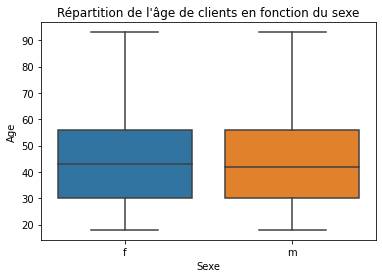

In [12]:
#Rajouter une colonne de l'âge de clients (en 2021)
customers['age']=2021-customers[['birth']]+1

#Boîte à moustaches
sns.boxplot(x="sex", y="age", data=customers).set(
    title="Répartition de l'âge de clients en fonction du sexe",
    xlabel='Sexe',
    ylabel='Age')
print(Fore.BLUE + Style.BRIGHT + f"La réprésentation en boîte à moustaches de l'âge des clients des 2 sexes sont similaires")

customers.groupby(by='sex').describe()['age']

<ul style="font-family:Time"><b>b. <u>Nombre de clients en fonction de leur âge</u></b>
</ul>

Les clients ont de 18 à 93 ans. Il y a un nombre atypique (ou anormal) de clients qui sont nés en 2004 ou des clients qui ont 18 ans


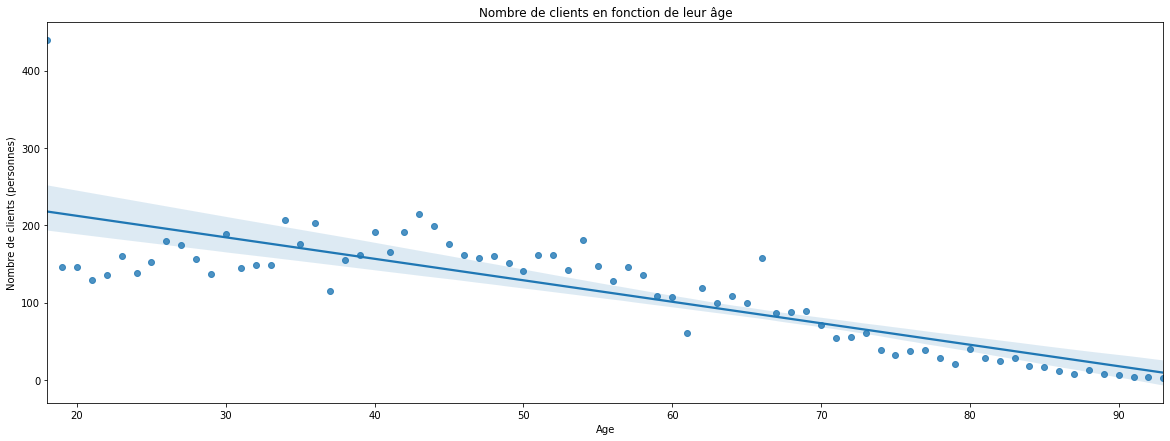

In [13]:
#Groupement du nombre de clients par leur âge
nb_clients = customers.groupby(by='age')['age'].count().to_frame()
nb_clients.rename(columns={'age':'nombre de clients'}, inplace=True) 
nb_clients.reset_index(inplace=True)

#Répartition et relation du nombre de clients en fonction de leur âge
figure = plt.figure(figsize = (20, 7))
sns.regplot(x='age', y='nombre de clients',data=nb_clients, fit_reg=True).set(
    title='Nombre de clients en fonction de leur âge',
    xlabel='Age',
    ylabel='Nombre de clients (personnes)')

print(Fore.BLUE+ Style.BRIGHT + f"Les clients ont de 18 à 93 ans. \
Il y a un nombre atypique (ou anormal) de clients qui sont nés en 2004 ou des clients qui ont 18 ans")
#nb_clients.corr()

<ul style="font-family:Time"><b><u>Observation</u> :</b>
    <ul style="font-family:Time"><br>
      <li>Ici, on obtient une répartition du nombre de clients en fonction de leurs âges</li>
      <li>En générale, plus les clients sont âgés, plus ils sont moins nombreux. La corrélation entre les 2 axes est négative ou ils varient en sens contraire</li>
     <li>Il existe également une valeur extrême en haut à gauche, ce qui correspond aux clients qui ont 18 ans en 2021</li>
  <ul>

<ul style="font-family:Time"><b><u>Hypothèse de l'anomalie du nombre de clients nés en 2004 (ou 18 ans en 2021)</u>:</b>
  <ul style="font-family:Time"><br>
      <li>Le nombre observé des clients qui sont nés en 2004 est supérieur à 400 et plus de 2 fois par rapport à la 2ème classe</li>
      <li>Ce phénomène peut être dû à la restriction d'âge lors de la création du compte personnel</li>
      <li>Plus précisément, les clients qui sont nés en 2004 ne sont pas tout à fait des clients ayant 18 ans</li>
      <li>Hypothèse proposée ici est que ce sont des clients nés à partir de 2004 (inclus) et ils se trouvent dans la tranche d'âge dite 'égale ou moins de 18 ans', présentée par année 2004.</li>
  <ul>

<ul style="font-family:Time"><b>c. <u>Répartition du nombre de clients masculins et féminins en fonction d'âges</u></b>
</ul>

(152, 3)

Répartition du nombre de femmes et hommes en fonction d'âges


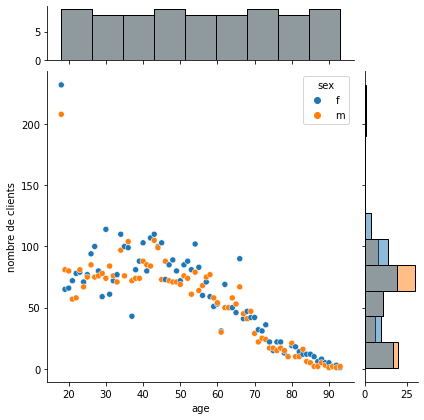

In [14]:
#Groupement du nombre de clients par leur age et leur sex
nb_clients_sex = customers.groupby(by=['age', 'sex'])['age'].count().to_frame()
nb_clients_sex.rename(columns={'age':'nombre de clients'}, inplace=True) 
nb_clients_sex.reset_index(inplace=True)
display(nb_clients_sex.shape)

#Répartition du nombre de clients masculins et féminins en fonction de leur âge
g = sns.JointGrid(data=nb_clients_sex, x="age", y="nombre de clients", hue="sex", marginal_ticks=True)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)
print(Fore.BLUE+ Style.BRIGHT + f"Répartition du nombre de femmes et hommes en fonction d'âges")

<ul style="font-family:Time"><b><u>Observation</u> :</b>
    <ul style="font-family:Time"><br>
     <li>Le nuage des points en dessus représente le nombre de clients masculins et féminins par âge</li>
     <li>Les premières observations indiquent qu'il n'y a pas beaucoup de différences dans la répartition d'âges des 2 sexes </li>
    <li>Cependant, en observant l'histogramme à droite, ce qui représente la distribution des points de l'axe vertical (nombre de clients), on peut voir bien une forte concentration des points qui se trouvent autour de 75 et autour de 15, avec un nombre d'hommes qui est plus important. Au contraire, les femmes se présentent en dominant chez les autres tranches (sauf la tranche de 47 à 53). De plus, on observe également des valeurs aberrantes extrêmes en haut, ce qui correspond au nombre de clients ayant 18 ans</li>
    <li>En revanche, pour l’axe des x, les colonnes de l'histogramme en haut sont similaires (sachant que les âges de clients sont classés en ordre croissant de 18 ans à 93 ans) ou la répartition des points sur l'axe des âges est moins variée</li>
  <ul>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>II. Préparation de données de la vente en ligne<br></h2>

<ul style="font-family:Time">
      <li>Afin de rapprocher des données de la vente en ligne, je commence par le regroupement des informations de la vente, du produits et du client</li>
      <li>Pour cela, je fais des jointures à droites et à gauches des couples de données (transactions, customers) et (transactions, products) afin de vérifier la nature de données</li>
      <li>Ensuite, je fais une jointure entière des 3 données en gardant que les données de la vente en ligne (ou de celles des transactions) pour répondre aux besoins d'analyses plus tard.</li>
  <ul>

<h4 style="color:black">1. Jointures du couple (transactions, customers)<br></h4>

In [15]:
#Jointure à gauche (transactions, customers)
print(Fore.BLUE + Style.BRIGHT + f"Jointure à gauche des données de la transaction et du client")
left_trs_cts=new_transactions.merge(customers, on='client_id', how='left')
display(left_trs_cts.sort_values(by='date').shape)

#Jointure à droite (transactions, customers)
print(Fore.BLUE + Style.BRIGHT + f"Jointure à droite des données de la transaction et du client")
right_trs_cts=new_transactions.merge(customers, on='client_id', how='right')
display(right_trs_cts.sort_values(by='date').shape)

#La diférence entre les 2 jointures
print(Fore.BLUE + Style.BRIGHT + f"Liste des clients qui n'effectuent pas des achats en lignes")
display(right_trs_cts[right_trs_cts['id_prod'].isnull()].shape)

print(Fore.BLUE + Style.BRIGHT + f"Nombre de clients qui n'effectuent pas des achats en lignes est égal à {len(right_trs_cts[right_trs_cts['id_prod'].isnull()])}")

Jointure à gauche des données de la transaction et du client


(679332, 9)

Jointure à droite des données de la transaction et du client


(679355, 9)

Liste des clients qui n'effectuent pas des achats en lignes


(23, 9)

Nombre de clients qui n'effectuent pas des achats en lignes est égal à 23


<h4 style="color:black"><br>2. Jointures du couple (transactions, products) <br></h4>

In [16]:
#Jointure à gauche (transactions, products)
print(Fore.BLUE+Style.BRIGHT + f"Jointure à gauche des données de la transaction et du produit")
left_trs_prod=new_transactions.merge(products, on='id_prod', how='left')
display(left_trs_prod.sort_values(by='date').shape)

#Jointure à droite (transactions, customers)
print(Fore.BLUE+Style.BRIGHT + f"Jointure à droite des données de la transaction et du produit")
right_trs_prod=new_transactions.merge(products, on='id_prod', how='right')
display(right_trs_prod.sort_values(by='date').shape)

#La diférence entre les 2 jointures
print(Fore.BLUE+Style.BRIGHT + f"Liste des produits qui ne sont pas vendus en ligne")
display(right_trs_prod[right_trs_prod['date'].isnull()].shape)

#Vérification le présence des produits vendus en ligne avec BD de produits
products['id_prod'].to_list() #Liste des identifiants de produist de la BD 'product'
display(left_trs_prod[~left_trs_prod['id_prod'].isin(products['id_prod'].to_list())].head())
print(Fore.YELLOW+Style.BRIGHT + f"Remarque: Le produit '0_2245' est vendu en ligne mais il n'apparait pas dans 'products' et il concerne 221 transactions")


Jointure à gauche des données de la transaction et du produit


(679332, 8)

Jointure à droite des données de la transaction et du produit


(679133, 8)

Liste des produits qui ne sont pas vendus en ligne


(22, 8)

,id_prod,date,session_id,client_id,new_date,month,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,2022-09-01,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,2022-07-01,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,2022-12-01,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,2021-08-01,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,2022-07-01,NaN,NaN


Remarque: Le produit '0_2245' est vendu en ligne mais il n'apparait pas dans 'products' et il concerne 221 transactions


<ul style="font-family:Time"><b><u>En résumé</u> :</b>
    <ul style="font-family:Time"><br>
      <li>Après les analyses des jointures à gauches et à droites des couples de BD, on peut déduire qu'il existe des produits qui ne sont pas vendus en ligne et des clients qui n'ont pas encore effectués des achats sur notre site web. Ces 2 hypothèses nous expliquent la différence entre les types de jointures réalisées</li>
      <li>De plus, il existe également un manque des données des produits. Plus précisément, je trouve que le produit <b><i>'0_2245'</b></i>, noté dans la remarque (ligne jaune), <b><i>est vendu 221 fois</b></i> en ligne mais il <b><i>n'a pas été enregistré</b></i> dans le fichier 'product'. Donc, je vais la noter et la monter plus tard à Annabelle pour qu'elle puisse voir avec l'autre équipe. Cependant, afin d'analyser la vente en ligne, dans le premier temps, je décide de classer ce produit dans la catégorie 0 et le mettre un prix qui est égal à la moyenne des produits de cette catégorie en attendant la vérification des autres équipes (car en vérifiant le classement de la catégorie des livres, je trouve que les préfixes 'id_prod' signifient également leur catégorie)</li>   
  <ul>

In [17]:
#Créer un df contenant le produit à mise à jour
product_0_2245=pd.DataFrame({'id_prod' :  ['0_2245']
                             ,'price': [11.73]
                             ,'categ' : [0]})
display(product_0_2245)
print(Fore.BLUE + Style.BRIGHT + f"Création un nouveau df servira la mise à jour")

#Mise à jour fichier 'products'
products_update=products.append(product_0_2245, ignore_index=True)
#display(products_update)
print(Fore.BLUE + Style.BRIGHT + f"Df 'products_update' contenant les données mise à jour de produits")

#Vérification
display(products_update.shape)
#display(products_update[products_update['id_prod']=="0_2245"])
#print(Fore.BLUE + Style.BRIGHT + f"Vérification de la mise à jour")

,id_prod,price,categ
0,0_2245,11.73,0


Création un nouveau df servira la mise à jour
Df 'products_update' contenant les données mise à jour de produits


(3288, 3)

<h4 style="color:black"><br>3. Jointure des 3 données<br></h4>

<ul style="font-family:Time">Suite aux demandes d'analyse d'Antoine et de Julie, je fais ensuite un rapprochement des 3 fichiers en concentrant que la vente en ligne. C'est pour cette raison, je fais une jointure complète des 3 fichiers. Le résultat de ce regroupement est réunit dans df  'transactions_web'
</ul>

In [18]:
#Rapprochement des données
#data_transactions_web = new_transactions.merge(products_update, on='id_prod', how= 'outer')\
#.merge(customers, on='client_id', how= 'outer', indicator=True) #Full joint

print(Fore.BLUE + Style.BRIGHT + f"Rapprochement de données de la vente en ligne")
transactions_web=new_transactions.merge(products_update, on='id_prod', how= 'left')\
.merge(customers, on='client_id', how= 'left') #jointure à gauche en gardant toutes les informations de la transaction

display(transactions_web.head())
print(Fore.YELLOW + Style.BRIGHT + f"A noter que cette donnée contient toutes les informations de la vente en ligne (transactions, clients et produits)")

Rapprochement de données de la vente en ligne


,id_prod,date,session_id,client_id,new_date,month,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05-01,4.18,0,f,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02-01,15.99,1,m,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06-01,7.99,0,f,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06-01,69.99,2,m,2000,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01-01,4.99,0,m,1980,42


A noter que cette donnée contient toutes les informations de la vente en ligne (transactions, clients et produits)


In [19]:
#Exportation de données épurées
transactions_web.to_csv('transactions_web.csv',index=False, encoding='utf-8')

#Eventuelement une insertion du résultat dans une base

# --------------------------------------------------------------------------------------